In [2]:
import pandas as pd
import numpy as np
# import pinball loss from sklearn
from sklearn.metrics import mean_pinball_loss

In [3]:
# load csv file
df = pd.read_csv('ensemble_results_no_mostrecent.csv')
# drop columns containing 'var'
df = df.loc[:, ~df.columns.str.contains('_var')]
print(df.shape)

# min and max values for datetime
min_date = df['datetime'].min()
max_date = df['datetime'].max()
print('Min date:', min_date)
print('Max date:', max_date)

df_clean = df.rename(columns={'10_predictions': 'q10_QRA', '50_predictions': 'q50_QRA', '90_predictions': 'q90_QRA'})
df_clean#.head()

(83040, 29)
Min date: 2021-02-01 00:00:00+00:00
Max date: 2023-06-15 23:45:00+00:00


,datetime,measured,mostrecentforecast,dayahead11hforecast,dayaheadforecast,weekaheadforecast,mostrecentconfidence10,dayahead11hconfidence10,dayaheadconfidence10,weekaheadconfidence10,...,q90_best_model,q10_weight_avg,q50_weight_avg,q90_weight_avg,q10_weight_avg_soft,q50_weight_avg_soft,q90_weight_avg_soft,q10_equal_weights,q50_equal_weights,q90_equal_weights
0,2021-02-01 00:00:00+00:00,359.51,711.61,1256.36,1292.65,1571.94,400.20,516.02,539.30,109.03,...,1359.73,444.392827,1352.584368,1566.818501,538.891822,1260.527311,1359.774759,391.1375,1208.1400,1456.5850
1,2021-02-01 00:15:00+00:00,337.28,683.16,1210.05,1229.97,1547.77,374.69,485.48,544.80,108.99,...,1352.21,434.802995,1306.129418,1538.533937,543.759918,1212.337485,1352.200780,378.4900,1167.7375,1425.7900
2,2021-02-01 00:30:00+00:00,331.07,642.53,1185.44,1164.05,1578.32,342.66,464.40,508.39,110.05,...,1310.84,411.819638,1280.966725,1515.571899,507.618705,1182.983710,1310.851755,356.3750,1142.5850,1401.9775
3,2021-02-01 00:45:00+00:00,313.61,596.20,1190.46,1113.09,1633.52,314.97,458.53,483.93,119.24,...,1281.50,401.288815,1278.776463,1503.835143,483.484651,1181.575325,1281.537532,344.1675,1133.3175,1383.1150
4,2021-02-01 01:00:00+00:00,317.85,553.78,1199.45,1061.04,1658.29,291.81,458.11,463.19,143.16,...,1249.97,397.346659,1269.664677,1491.758570,463.100930,1183.555883,1250.036519,339.0675,1118.1400,1366.9300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83035,2023-06-15 22:45:00+00:00,71.11,375.17,578.44,584.01,1058.67,146.12,286.31,316.14,197.79,...,1829.62,249.571538,864.488158,1170.688146,197.790000,1058.670000,1829.158537,236.5900,649.0725,977.3300
83036,2023-06-15 23:00:00+00:00,63.06,358.15,558.96,551.27,1031.17,136.58,270.11,294.69,196.63,...,1810.12,239.568236,837.512281,1150.173938,196.630000,1031.170000,1809.656357,224.5025,624.8875,958.2075
83037,2023-06-15 23:15:00+00:00,61.10,348.51,529.24,512.25,1023.82,137.57,248.29,268.81,195.49,...,1802.55,227.057014,819.143051,1122.920262,195.490000,1023.820000,1802.071234,212.5400,603.4550,934.2975
83038,2023-06-15 23:30:00+00:00,57.36,339.93,496.04,477.34,1015.57,134.45,227.34,246.04,194.34,...,1789.58,215.535585,800.391633,1096.544009,194.340000,1015.570000,1789.091371,200.5425,582.2200,912.5400


In [4]:
# join the two dataframes
df = df_clean.copy() #.set_index('datetime').join(df_stack_clean.set_index('datetime')[['q10_stack', 'q50_stack', 'q90_stack']], on='datetime').reset_index()

# add date column
df['date'] = pd.to_datetime(df['datetime']).dt.date

# add month-year column
df['month_year'] = pd.to_datetime(df['datetime']).dt.to_period('M')

df.head()

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_79303/788057650.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = pd.to_datetime(df['datetime']).dt.to_period('M')


,datetime,measured,mostrecentforecast,dayahead11hforecast,dayaheadforecast,weekaheadforecast,mostrecentconfidence10,dayahead11hconfidence10,dayaheadconfidence10,weekaheadconfidence10,...,q50_weight_avg,q90_weight_avg,q10_weight_avg_soft,q50_weight_avg_soft,q90_weight_avg_soft,q10_equal_weights,q50_equal_weights,q90_equal_weights,date,month_year
0,2021-02-01 00:00:00+00:00,359.51,711.61,1256.36,1292.65,1571.94,400.20,516.02,539.30,109.03,...,1352.584368,1566.818501,538.891822,1260.527311,1359.774759,391.1375,1208.1400,1456.5850,2021-02-01,2021-02
1,2021-02-01 00:15:00+00:00,337.28,683.16,1210.05,1229.97,1547.77,374.69,485.48,544.80,108.99,...,1306.129418,1538.533937,543.759918,1212.337485,1352.200780,378.4900,1167.7375,1425.7900,2021-02-01,2021-02
2,2021-02-01 00:30:00+00:00,331.07,642.53,1185.44,1164.05,1578.32,342.66,464.40,508.39,110.05,...,1280.966725,1515.571899,507.618705,1182.983710,1310.851755,356.3750,1142.5850,1401.9775,2021-02-01,2021-02
3,2021-02-01 00:45:00+00:00,313.61,596.20,1190.46,1113.09,1633.52,314.97,458.53,483.93,119.24,...,1278.776463,1503.835143,483.484651,1181.575325,1281.537532,344.1675,1133.3175,1383.1150,2021-02-01,2021-02
4,2021-02-01 01:00:00+00:00,317.85,553.78,1199.45,1061.04,1658.29,291.81,458.11,463.19,143.16,...,1269.664677,1491.758570,463.100930,1183.555883,1250.036519,339.0675,1118.1400,1366.9300,2021-02-01,2021-02


In [5]:
# calculate rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# calculate mean pinball loss with sklearn
def mean_pinball_loss_sklearn(targets, predictions, tau):
    return mean_pinball_loss(targets, predictions, alpha=tau)

In [6]:
def compute_rmse_testing_days(df, predictions, targets = 'measured', date_column = 'date'):
    " Compute RMSE for each day in the dataframe "
    rmse_list = []
    for date in df[date_column].unique():
        date_df = df[df[date_column] == date]
        rmse_list.append(rmse(date_df[targets], date_df[predictions]))
    return rmse_list

def compute_pinball_loss_testing_days(df, tau, predictions, targets = 'measured', date_column = 'date'):
    " Compute Pinball Loss for each day in the dataframe "
    pinball_loss_list = []
    for date in df[date_column].unique():
        date_df = df[df[date_column] == date]
        pinball_loss_list.append(mean_pinball_loss_sklearn(date_df[targets], date_df[predictions], tau))
    return pinball_loss_list

In [7]:
# plot rmse
import matplotlib.pyplot as plt

def plot_ts_loss(df, list_loss_1, list_loss_2, model_name_1, model_name_2, date_column = 'date'):
    """ Plot timeseries loss"""
    assert len(list_loss_1) == len(list_loss_2), "The two lists must have the same length"
    assert len(list_loss_1) == len(df[date_column].unique()), "The length of the list must be equal to the number of unique dates in the dataframe"
    assert len(list_loss_2) == len(df[date_column].unique()), "The length of the list must be equal to the number of unique dates in the dataframe"
    # plot ensemble
    plt.figure(figsize=(25, 7))
    # x-axis date, y-axis rmse
    if date_column == 'date':
        timestamps = df[date_column].unique()
    else:
        timestamps = df[date_column].unique().to_timestamp()
    plt.plot(timestamps, list_loss_1, label=model_name_1)
    plt.plot(timestamps, list_loss_2, label=model_name_2, alpha=0.5, linestyle='dashed')
    # fill between the two models
    plt.fill_between(timestamps, list_loss_1, list_loss_2, color='red', alpha=0.3)
    plt.title('RMSE by date')
    plt.ylabel('RMSE')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

In [8]:
# ----- Date-based analysis ----- 

# results for the ensemble model QRA
# calculate rmse
rmse_list_QRA = compute_rmse_testing_days(df, predictions='q50_QRA')
# calculate pinball loss
pinball_loss_01_list_QRA = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_QRA')
pinball_loss_09_list_QRA = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_QRA')

# results for the day-ahead model
# calculate rmse
rmse_list_dayahead = compute_rmse_testing_days(df, predictions='dayaheadforecast')
# calculate pinball loss
pinball_loss_01_list_dayahead = compute_pinball_loss_testing_days(df, tau=0.1, predictions='dayaheadconfidence10')
pinball_loss_09_list_dayahead = compute_pinball_loss_testing_days(df, tau=0.9, predictions='dayaheadconfidence90')

# results for dayahead11hforecast model
# calculate rmse
rmse_list_dayahead11h = compute_rmse_testing_days(df, predictions='dayahead11hforecast')
# calculate pinball loss
pinball_loss_01_list_dayahead11h = compute_pinball_loss_testing_days(df, tau=0.1, predictions='dayahead11hconfidence10')
pinball_loss_09_list_dayahead11h = compute_pinball_loss_testing_days(df, tau=0.9, predictions='dayahead11hconfidence90')

# results for weekaheadforecast model
# calculate rmse
rmse_list_weekahead = compute_rmse_testing_days(df, predictions='weekaheadforecast')
# calculate pinball loss
pinball_loss_01_list_weekahead = compute_pinball_loss_testing_days(df, tau=0.1, predictions='weekaheadconfidence10')
pinball_loss_09_list_weekahead = compute_pinball_loss_testing_days(df, tau=0.9, predictions='weekaheadconfidence90')

# results for 'q10_best_model', 'q50_best_model', 'q90_best_model' model
# calculate rmse
rmse_list_best = compute_rmse_testing_days(df, predictions='q50_best_model')
# calculate pinball loss
pinball_loss_01_list_best = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_best_model')
pinball_loss_09_list_best = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_best_model')

# results for 'q10_weight_avg', 'q50_weight_avg', 'q90_weight_avg' model
# calculate rmse
rmse_list_weight_avg = compute_rmse_testing_days(df, predictions='q50_weight_avg')
# calculate pinball loss
pinball_loss_01_list_weight_avg = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_weight_avg')
pinball_loss_09_list_weight_avg = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_weight_avg')

# results for 'q10_weight_avg_soft', 'q50_weight_avg_soft', 'q90_weight_avg_soft' model
# calculate rmse
rmse_list_weight_avg_soft = compute_rmse_testing_days(df, predictions='q50_weight_avg_soft')
# calculate pinball loss
pinball_loss_01_list_weight_avg_soft = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_weight_avg_soft')
pinball_loss_09_list_weight_avg_soft = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_weight_avg_soft')

# results for 'q10_equal_weights', 'q50_equal_weights', 'q90_equal_weights' model
# calculate rmse
rmse_list_equal_weights = compute_rmse_testing_days(df, predictions='q50_equal_weights')
# calculate pinball loss
pinball_loss_01_list_equal_weights = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_equal_weights')
pinball_loss_09_list_equal_weights = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_equal_weights')

In [9]:
# ----- Motnhly-Year-based analysis ----- 

# results for the ensemble model QRA
# calculate rmse
rmse_list_QRA_month_year = compute_rmse_testing_days(df, predictions='q50_QRA', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_QRA_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_QRA', date_column='month_year')
pinball_loss_09_list_QRA_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_QRA', date_column='month_year')

# results for the day-ahead model
# calculate rmse
rmse_list_dayahead_month_year = compute_rmse_testing_days(df, predictions='dayaheadforecast', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_dayahead_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='dayaheadconfidence10', date_column='month_year')
pinball_loss_09_list_dayahead_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='dayaheadconfidence90', date_column='month_year')

# results for dayahead11hforecast model
# calculate rmse
rmse_list_dayahead11h_month_year = compute_rmse_testing_days(df, predictions='dayahead11hforecast', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_dayahead11h_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='dayahead11hconfidence10', date_column='month_year')
pinball_loss_09_list_dayahead11h_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='dayahead11hconfidence90', date_column='month_year')

# results for weekaheadforecast model
# calculate rmse
rmse_list_weekahead_month_year = compute_rmse_testing_days(df, predictions='weekaheadforecast', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_weekahead_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='weekaheadconfidence10', date_column='month_year')
pinball_loss_09_list_weekahead_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='weekaheadconfidence90', date_column='month_year')

# results for 'q10_best_model', 'q50_best_model', 'q90_best_model' model
# calculate rmse
rmse_list_best_month_year = compute_rmse_testing_days(df, predictions='q50_best_model', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_best_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_best_model', date_column='month_year')
pinball_loss_09_list_best_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_best_model', date_column='month_year')

# results for 'q10_weight_avg', 'q50_weight_avg', 'q90_weight_avg' model
# calculate rmse
rmse_list_weight_avg_month_year = compute_rmse_testing_days(df, predictions='q50_weight_avg', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_weight_avg_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_weight_avg', date_column='month_year')
pinball_loss_09_list_weight_avg_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_weight_avg', date_column='month_year')

# results for 'q10_weight_avg_soft', 'q50_weight_avg_soft', 'q90_weight_avg_soft' model
# calculate rmse
rmse_list_weight_avg_soft_month_year = compute_rmse_testing_days(df, predictions='q50_weight_avg_soft', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_weight_avg_soft_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_weight_avg_soft', date_column='month_year')
pinball_loss_09_list_weight_avg_soft_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_weight_avg_soft', date_column='month_year')

# results for 'q10_equal_weights', 'q50_equal_weights', 'q90_equal_weights' model
# calculate rmse
rmse_list_equal_weights_month_year = compute_rmse_testing_days(df, predictions='q50_equal_weights', date_column='month_year')
# calculate pinball loss
pinball_loss_01_list_equal_weights_month_year = compute_pinball_loss_testing_days(df, tau=0.1, predictions='q10_equal_weights', date_column='month_year')
pinball_loss_09_list_equal_weights_month_year = compute_pinball_loss_testing_days(df, tau=0.9, predictions='q90_equal_weights', date_column='month_year')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(loss_list_QRA, loss_list_dayahead, loss_list_dayahead11h, loss_list_weekahead, loss_list_best, loss_list_weight_avg, loss_list_weight_avg_soft, loss_list_equal_weights, title):
    # compute mean rmse and std
    mean_loss_QRA, std_loss_QRA = np.mean(loss_list_QRA), np.std(loss_list_QRA)
    mean_loss_dayahead, std_loss_dayahead = np.mean(loss_list_dayahead), np.std(loss_list_dayahead)
    mean_loss_dayahead11h, std_loss_dayahead11h = np.mean(loss_list_dayahead11h), np.std(loss_list_dayahead11h)
    mean_loss_weekahead, std_loss_weekahead = np.mean(loss_list_weekahead), np.std(loss_list_weekahead)
    mean_loss_best_model, std_loss_best_model = np.mean(loss_list_best), np.std(loss_list_best)
    mean_loss_weighted_avg, std_loss_weighted_avg = np.mean(loss_list_weight_avg), np.std(loss_list_weight_avg)
    mean_loss_weighted_avg_soft, std_loss_weighted_avg_soft = np.mean(loss_list_weight_avg_soft), np.std(loss_list_weight_avg_soft)
    mean_loss_equal_weights, std_loss_equal_weights = np.mean(loss_list_equal_weights), np.std(loss_list_equal_weights)

    # plot seaborn barplot of mean rmse with std
    sns.set_theme(style="whitegrid")
    data = {'Forecaster': ['QRA', 'Best Model', 'Equal Weights', 'Weighted Avg', 'Weighted Avg Soft', 'Day-ahead', 'Day-ahead 11h', 'Week-ahead'],
            'Mean Loss': [mean_loss_QRA, mean_loss_best_model, mean_loss_equal_weights, mean_loss_weighted_avg, mean_loss_weighted_avg_soft, mean_loss_dayahead, mean_loss_dayahead11h, mean_loss_weekahead],
            'Std Loss': [std_loss_QRA, std_loss_best_model, std_loss_equal_weights, std_loss_weighted_avg, std_loss_weighted_avg_soft, std_loss_dayahead, std_loss_dayahead11h, std_loss_weekahead]}
    df = pd.DataFrame(data)
    sns.barplot(x='Mean Loss', y='Forecaster', data=df, alpha=0.5)
    # add error bars
    plt.errorbar(df['Mean Loss'], df['Forecaster'], xerr=df['Std Loss'], fmt='o')
    # plot legend
    plt.legend()
    plt.title(title)
    plt.show()



In [11]:
# rmse
list_QRA_over_dayahead = [1 if rmse_QRA <rmse_dayahead else 0 for rmse_QRA in rmse_list_QRA for rmse_dayahead in rmse_list_dayahead]
list_QRA_over_dayahead11h = [1 if rmse_QRA <rmse_dayahead11h else 0 for rmse_QRA in rmse_list_QRA for rmse_dayahead11h in rmse_list_dayahead11h]
list_QRA_over_weekahead = [1 if rmse_QRA <rmse_weekahead else 0 for rmse_QRA in rmse_list_QRA for rmse_weekahead in rmse_list_weekahead]
list_QRA_over_best = [1 if rmse_QRA <rmse_best else 0 for rmse_QRA in rmse_list_QRA for rmse_best in rmse_list_best]
list_QRA_over_equal_weights = [1 if rmse_QRA <rmse_equal_weights else 0 for rmse_QRA in rmse_list_QRA for rmse_equal_weights in rmse_list_equal_weights]
list_QRA_over_weight_avg = [1 if rmse_QRA <rmse_weight_avg else 0 for rmse_QRA in rmse_list_QRA for rmse_weight_avg in rmse_list_weight_avg]
list_QRA_over_weight_avg_soft = [1 if rmse_QRA <rmse_weight_avg_soft else 0 for rmse_QRA in rmse_list_QRA for rmse_weight_avg_soft in rmse_list_weight_avg_soft]
# pinball loss 0.1
list_QRA_over_dayahead_01 = [1 if pinball_loss_QRA <pinball_loss_dayahead else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_dayahead in pinball_loss_01_list_dayahead]
list_QRA_over_dayahead11h_01 = [1 if pinball_loss_QRA <pinball_loss_dayahead11h else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_dayahead11h in pinball_loss_01_list_dayahead11h]
list_QRA_over_weekahead_01 = [1 if pinball_loss_QRA <pinball_loss_weekahead else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_weekahead in pinball_loss_01_list_weekahead]
list_QRA_over_best_01 = [1 if pinball_loss_QRA <pinball_loss_best else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_best in pinball_loss_01_list_best]
list_QRA_over_equal_weights_01 = [1 if pinball_loss_QRA <pinball_loss_equal_weights else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_equal_weights in pinball_loss_01_list_equal_weights]
list_QRA_over_weight_avg_01 = [1 if pinball_loss_QRA <pinball_loss_weight_avg else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_weight_avg in pinball_loss_01_list_weight_avg]
list_QRA_over_weight_avg_soft_01 = [1 if pinball_loss_QRA <pinball_loss_weight_avg_soft else 0 for pinball_loss_QRA in pinball_loss_01_list_QRA for pinball_loss_weight_avg_soft in pinball_loss_01_list_weight_avg_soft]
# pinball loss 0.9
list_QRA_over_dayahead_09 = [1 if pinball_loss_QRA <pinball_loss_dayahead else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_dayahead in pinball_loss_09_list_dayahead]
list_QRA_over_dayahead11h_09 = [1 if pinball_loss_QRA <pinball_loss_dayahead11h else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_dayahead11h in pinball_loss_09_list_dayahead11h]
list_QRA_over_weekahead_09 = [1 if pinball_loss_QRA <pinball_loss_weekahead else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_weekahead in pinball_loss_09_list_weekahead]
list_QRA_over_best_09 = [1 if pinball_loss_QRA <pinball_loss_best else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_best in pinball_loss_09_list_best]
list_QRA_over_equal_weights_09 = [1 if pinball_loss_QRA <pinball_loss_equal_weights else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_equal_weights in pinball_loss_09_list_equal_weights]
list_QRA_over_weight_avg_09 = [1 if pinball_loss_QRA <pinball_loss_weight_avg else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_weight_avg in pinball_loss_09_list_weight_avg]
list_QRA_over_weight_avg_soft_09 = [1 if pinball_loss_QRA <pinball_loss_weight_avg_soft else 0 for pinball_loss_QRA in pinball_loss_09_list_QRA for pinball_loss_weight_avg_soft in pinball_loss_09_list_weight_avg_soft]

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_79303/2634726667.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


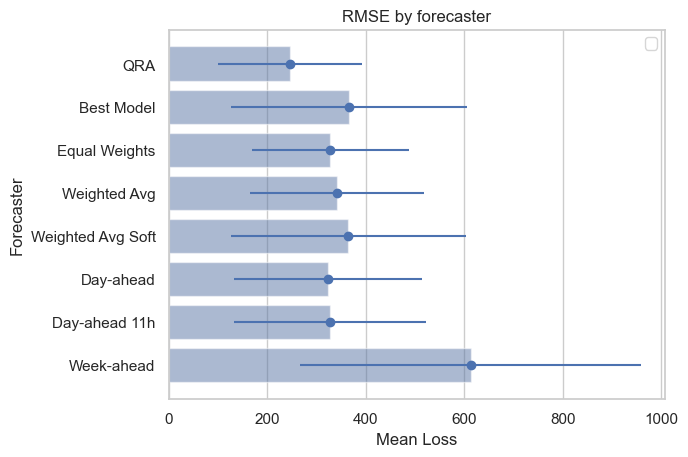

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_79303/2634726667.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


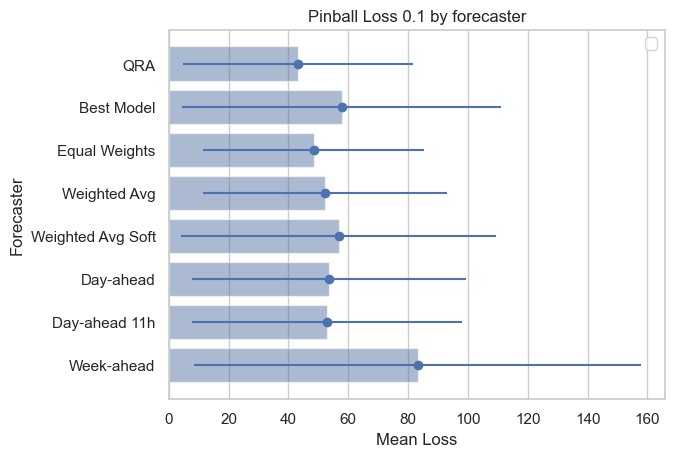

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_79303/2634726667.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


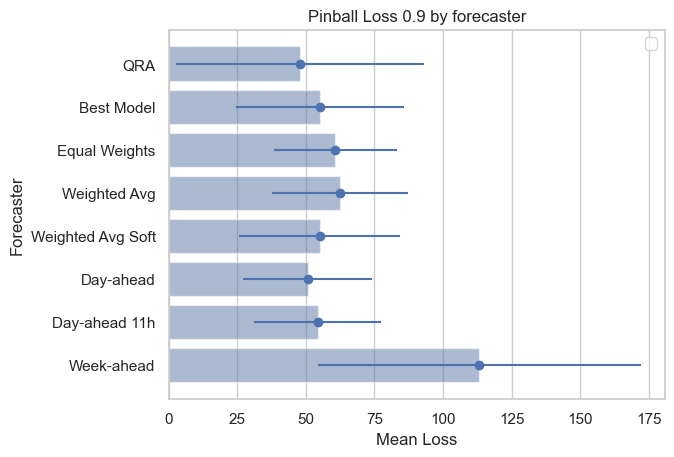

In [12]:
# plot barplot
barplot(rmse_list_QRA, rmse_list_dayahead, rmse_list_dayahead11h, rmse_list_weekahead, rmse_list_best, rmse_list_weight_avg, rmse_list_weight_avg_soft, rmse_list_equal_weights, title='RMSE by forecaster')
# pinball loss
barplot(pinball_loss_01_list_QRA, pinball_loss_01_list_dayahead, pinball_loss_01_list_dayahead11h, pinball_loss_01_list_weekahead, pinball_loss_01_list_best, pinball_loss_01_list_weight_avg, pinball_loss_01_list_weight_avg_soft, pinball_loss_01_list_equal_weights, title='Pinball Loss 0.1 by forecaster')
barplot(pinball_loss_09_list_QRA, pinball_loss_09_list_dayahead, pinball_loss_09_list_dayahead11h, pinball_loss_09_list_weekahead, pinball_loss_09_list_best, pinball_loss_09_list_weight_avg, pinball_loss_09_list_weight_avg_soft, pinball_loss_09_list_equal_weights, title='Pinball Loss 0.9 by forecaster')

In [13]:
print('Total number of days:', len(rmse_list_QRA))
print(' ')
print('------------------------------------')
print('              RMSE:')
print('          - Baselines -')
print('QRA is better than dayahead:', sum(list_QRA_over_dayahead)/len(list_QRA_over_dayahead))
print('QRA is better than dayahead11h:', sum(list_QRA_over_dayahead11h)/len(list_QRA_over_dayahead11h))
print('QRA is better than weekahead:', sum(list_QRA_over_weekahead)/len(list_QRA_over_weekahead))
print(' ')
print('          - Baseline Combination Schemes - ')
print('QRA is better than best model:', sum(list_QRA_over_best)/len(list_QRA_over_best))
print('QRA is better than equal weights:', sum(list_QRA_over_equal_weights)/len(list_QRA_over_equal_weights))
print('QRA is better than weight avg:', sum(list_QRA_over_weight_avg)/len(list_QRA_over_weight_avg))
print('QRA is better than weight avg soft:', sum(list_QRA_over_weight_avg_soft)/len(list_QRA_over_weight_avg_soft))
print(' ')
print('------------------------------------')
print('              Pinball Loss Tau=0.1:')
print('          - Baselines -')
print('QRA is better than dayahead:', sum(list_QRA_over_dayahead_01)/len(list_QRA_over_dayahead_01))
print('QRA is better than dayahead11h:', sum(list_QRA_over_dayahead11h_01)/len(list_QRA_over_dayahead11h_01))
print('QRA is better than weekahead:', sum(list_QRA_over_weekahead_01)/len(list_QRA_over_weekahead_01))
print(' ')
print('          - Baseline Combination Schemes - ')
print('QRA is better than best model:', sum(list_QRA_over_best_01)/len(list_QRA_over_best_01))
print('QRA is better than equal weights:', sum(list_QRA_over_equal_weights_01)/len(list_QRA_over_equal_weights_01))
print('QRA is better than weight avg:', sum(list_QRA_over_weight_avg_01)/len(list_QRA_over_weight_avg_01))
print('QRA is better than weight avg soft:', sum(list_QRA_over_weight_avg_soft_01)/len(list_QRA_over_weight_avg_soft_01))
print('------------------------------------')
print('              Pinball Loss Tau=0.9:')
print('          - Baselines -')
print('QRA is better than dayahead:', sum(list_QRA_over_dayahead_09)/len(list_QRA_over_dayahead_09))
print('QRA is better than dayahead11h:', sum(list_QRA_over_dayahead11h_09)/len(list_QRA_over_dayahead11h_09))
print('QRA is better than weekahead:', sum(list_QRA_over_weekahead_09)/len(list_QRA_over_weekahead_09))
print(' ')
print('          - Baseline Combination Schemes - ')
print('QRA is better than best model:', sum(list_QRA_over_best_09)/len(list_QRA_over_best_09))
print('QRA is better than equal weights:', sum(list_QRA_over_equal_weights_09)/len(list_QRA_over_equal_weights_09))
print('QRA is better than weight avg:', sum(list_QRA_over_weight_avg_09)/len(list_QRA_over_weight_avg_09))
print('QRA is better than weight avg soft:', sum(list_QRA_over_weight_avg_soft_09)/len(list_QRA_over_weight_avg_soft_09))
print('------------------------------------')
print(' ')

# create dataframe with the frequency results with header 'QRA over model'
df_freq = pd.DataFrame({
    'model': ['dayahead', 'dayahead11h', 'weekahead', 'best_model', 'equal_weights', 'weight_avg', 'weight_avg_soft'],
    'rmse': [sum(list_QRA_over_dayahead)/len(list_QRA_over_dayahead), sum(list_QRA_over_dayahead11h)/len(list_QRA_over_dayahead11h), sum(list_QRA_over_weekahead)/len(list_QRA_over_weekahead), sum(list_QRA_over_best)/len(list_QRA_over_best), sum(list_QRA_over_equal_weights)/len(list_QRA_over_equal_weights), sum(list_QRA_over_weight_avg)/len(list_QRA_over_weight_avg), sum(list_QRA_over_weight_avg_soft)/len(list_QRA_over_weight_avg_soft)],
    'pinball_loss_01': [sum(list_QRA_over_dayahead_01)/len(list_QRA_over_dayahead_01), sum(list_QRA_over_dayahead11h_01)/len(list_QRA_over_dayahead11h_01), sum(list_QRA_over_weekahead_01)/len(list_QRA_over_weekahead_01), sum(list_QRA_over_best_01)/len(list_QRA_over_best_01), sum(list_QRA_over_equal_weights_01)/len(list_QRA_over_equal_weights_01), sum(list_QRA_over_weight_avg_01)/len(list_QRA_over_weight_avg_01), sum(list_QRA_over_weight_avg_soft_01)/len(list_QRA_over_weight_avg_soft_01)],
    'pinball_loss_09': [sum(list_QRA_over_dayahead_09)/len(list_QRA_over_dayahead_09), sum(list_QRA_over_dayahead11h_09)/len(list_QRA_over_dayahead11h_09), sum(list_QRA_over_weekahead_09)/len(list_QRA_over_weekahead_09), sum(list_QRA_over_best_09)/len(list_QRA_over_best_09), sum(list_QRA_over_equal_weights_09)/len(list_QRA_over_equal_weights_09), sum(list_QRA_over_weight_avg_09)/len(list_QRA_over_weight_avg_09), sum(list_QRA_over_weight_avg_soft_09)/len(list_QRA_over_weight_avg_soft_09)]
})
df_freq

Total number of days: 865
 
------------------------------------
              RMSE:
          - Baselines -
QRA is better than dayahead: 0.6190918507133549
QRA is better than dayahead11h: 0.6227404858164323
QRA is better than weekahead: 0.8465595242072906
 
          - Baseline Combination Schemes - 
QRA is better than best model: 0.6568331718400214
QRA is better than equal weights: 0.6563747535834809
QRA is better than weight avg: 0.6652624544755922
QRA is better than weight avg soft: 0.6564054930001002
 
------------------------------------
              Pinball Loss Tau=0.1:
          - Baselines -
QRA is better than dayahead: 0.5733689732366601
QRA is better than dayahead11h: 0.5696815797387149
QRA is better than weekahead: 0.683915934378028
 
          - Baseline Combination Schemes - 
QRA is better than best model: 0.5889832603829062
QRA is better than equal weights: 0.555064318888035
QRA is better than weight avg: 0.5762076915366368
QRA is better than weight avg soft: 0.5836332

,model,rmse,pinball_loss_01,pinball_loss_09
0,dayahead,0.619092,0.573369,0.601513
1,dayahead11h,0.622740,0.569682,0.644062
2,weekahead,0.846560,0.683916,0.843167
3,best_model,0.656833,0.588983,0.621762
4,equal_weights,0.656375,0.555064,0.710383
5,weight_avg,0.665262,0.576208,0.714209
6,weight_avg_soft,0.656405,0.583633,0.624224


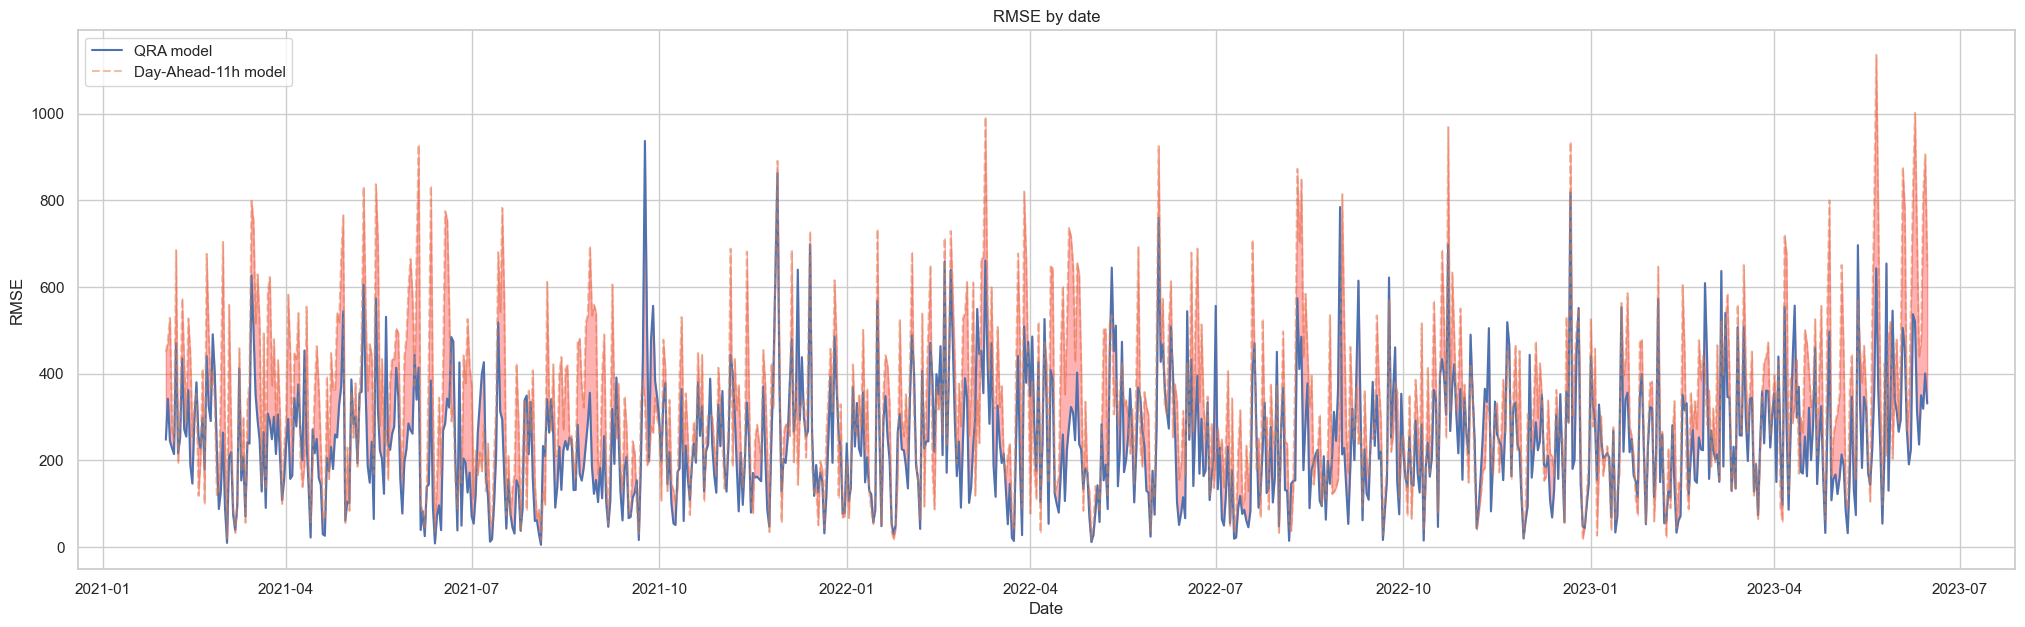

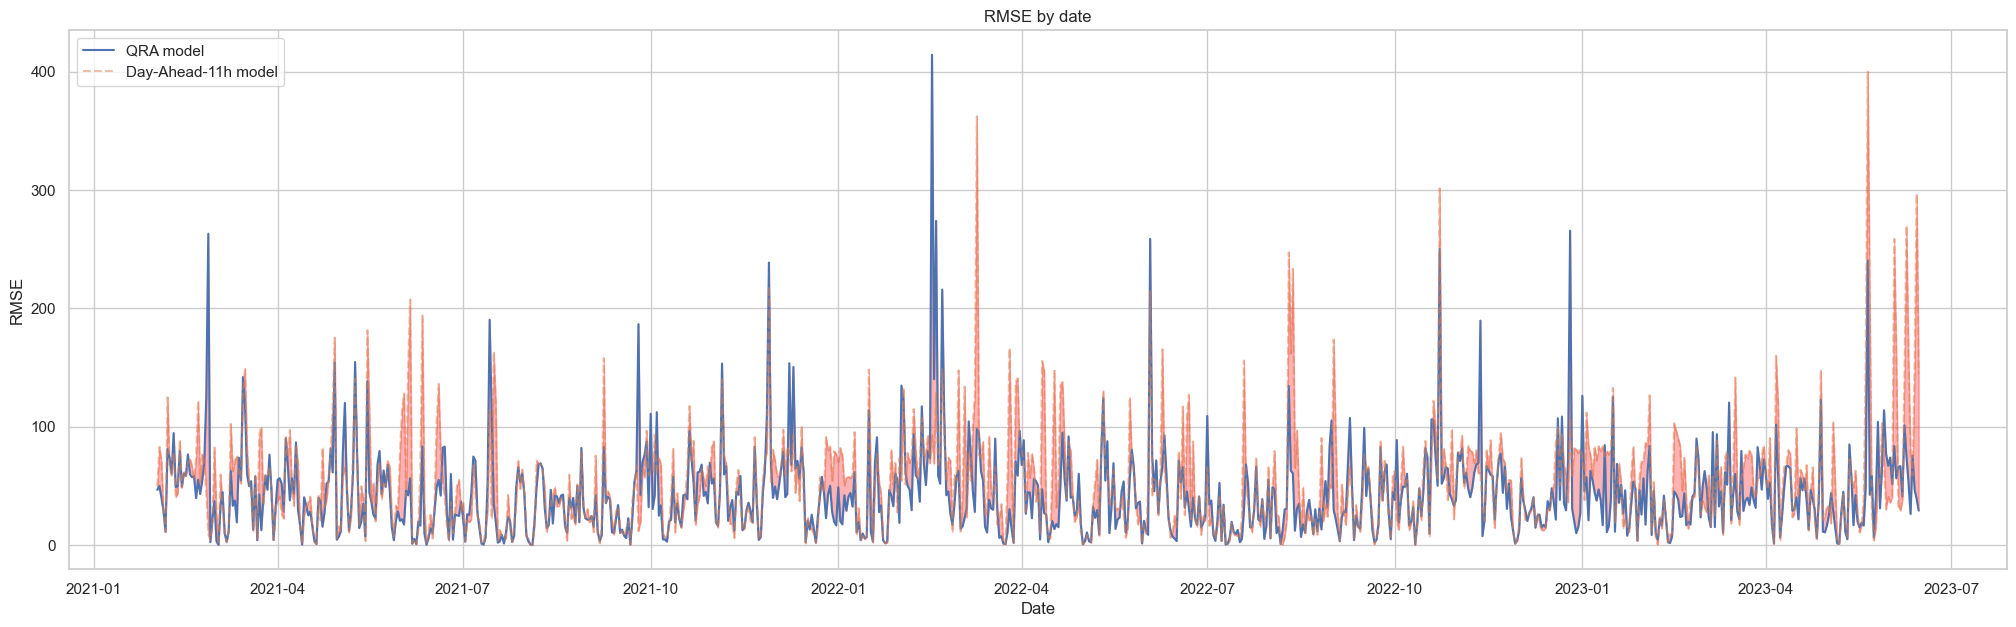

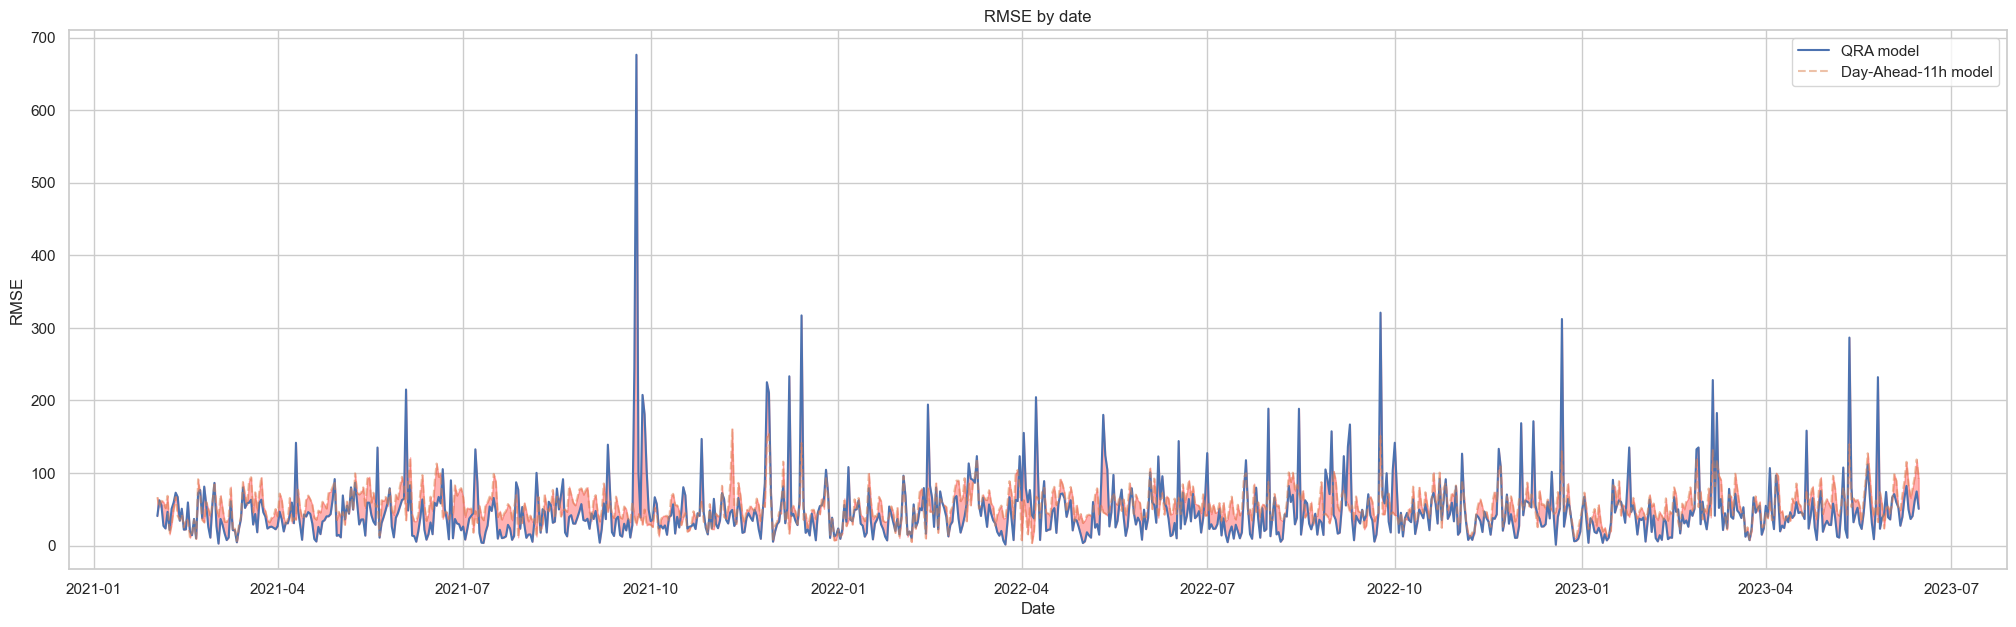

In [14]:
# Date-based analysis
plot_ts_loss(df, rmse_list_QRA, rmse_list_dayahead11h, 'QRA model', 'Day-Ahead-11h model')
plot_ts_loss(df, pinball_loss_01_list_QRA, pinball_loss_01_list_dayahead11h, 'QRA model', 'Day-Ahead-11h model')
plot_ts_loss(df, pinball_loss_09_list_QRA, pinball_loss_09_list_dayahead11h, 'QRA model', 'Day-Ahead-11h model')

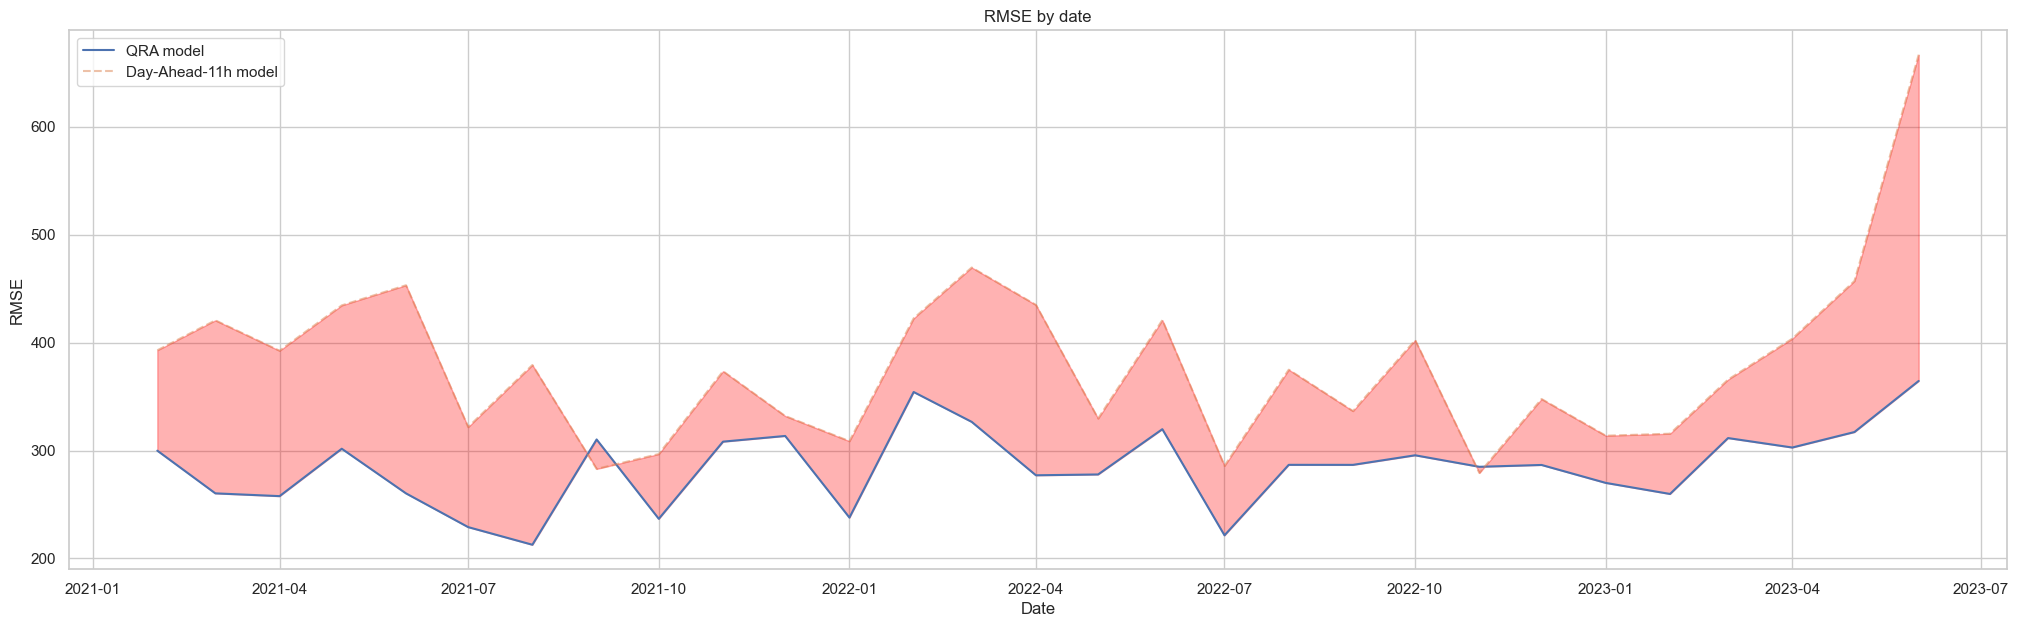

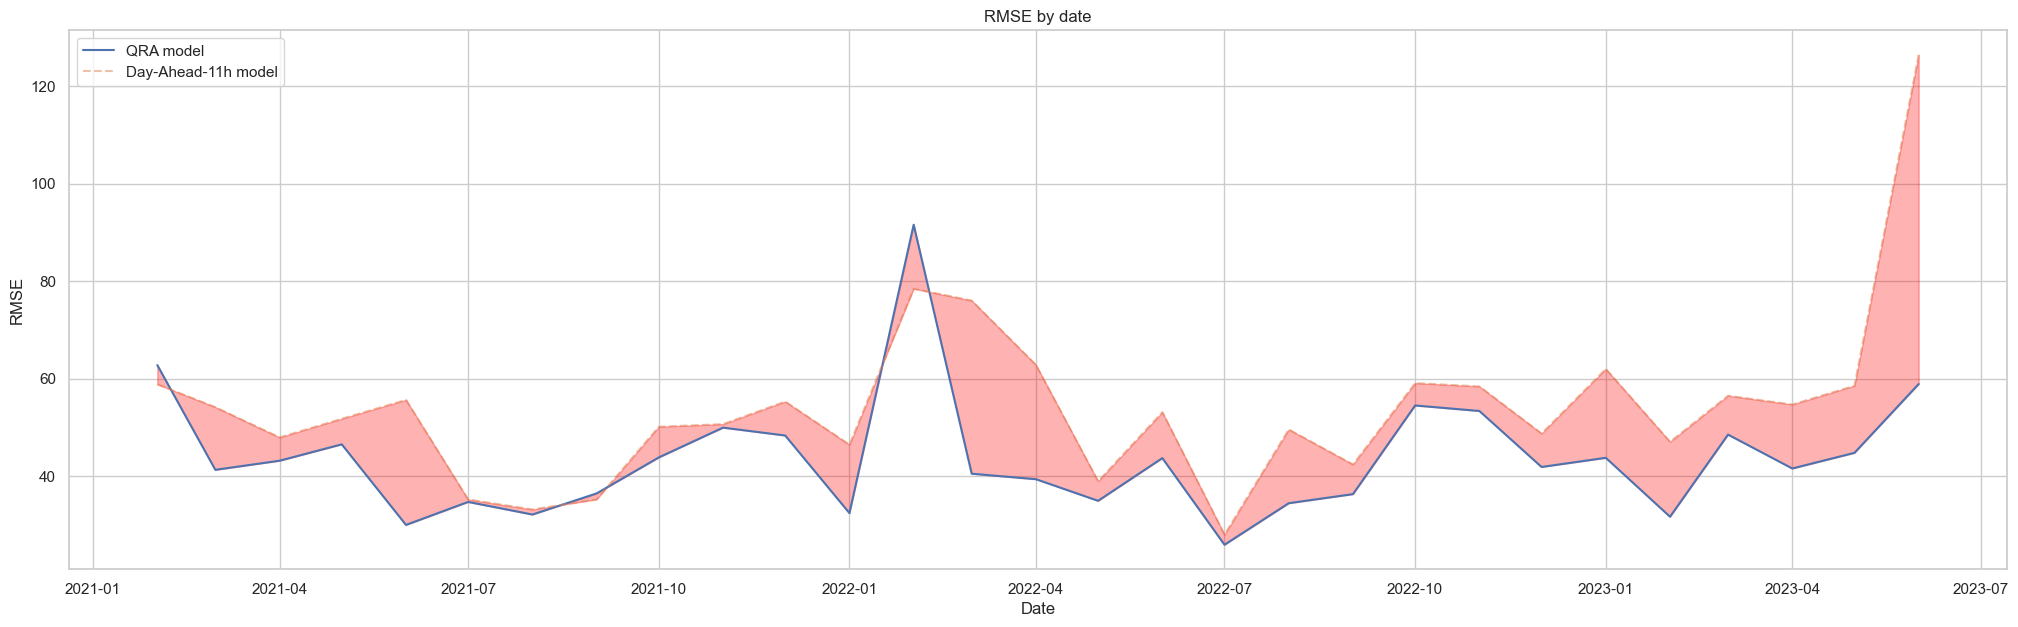

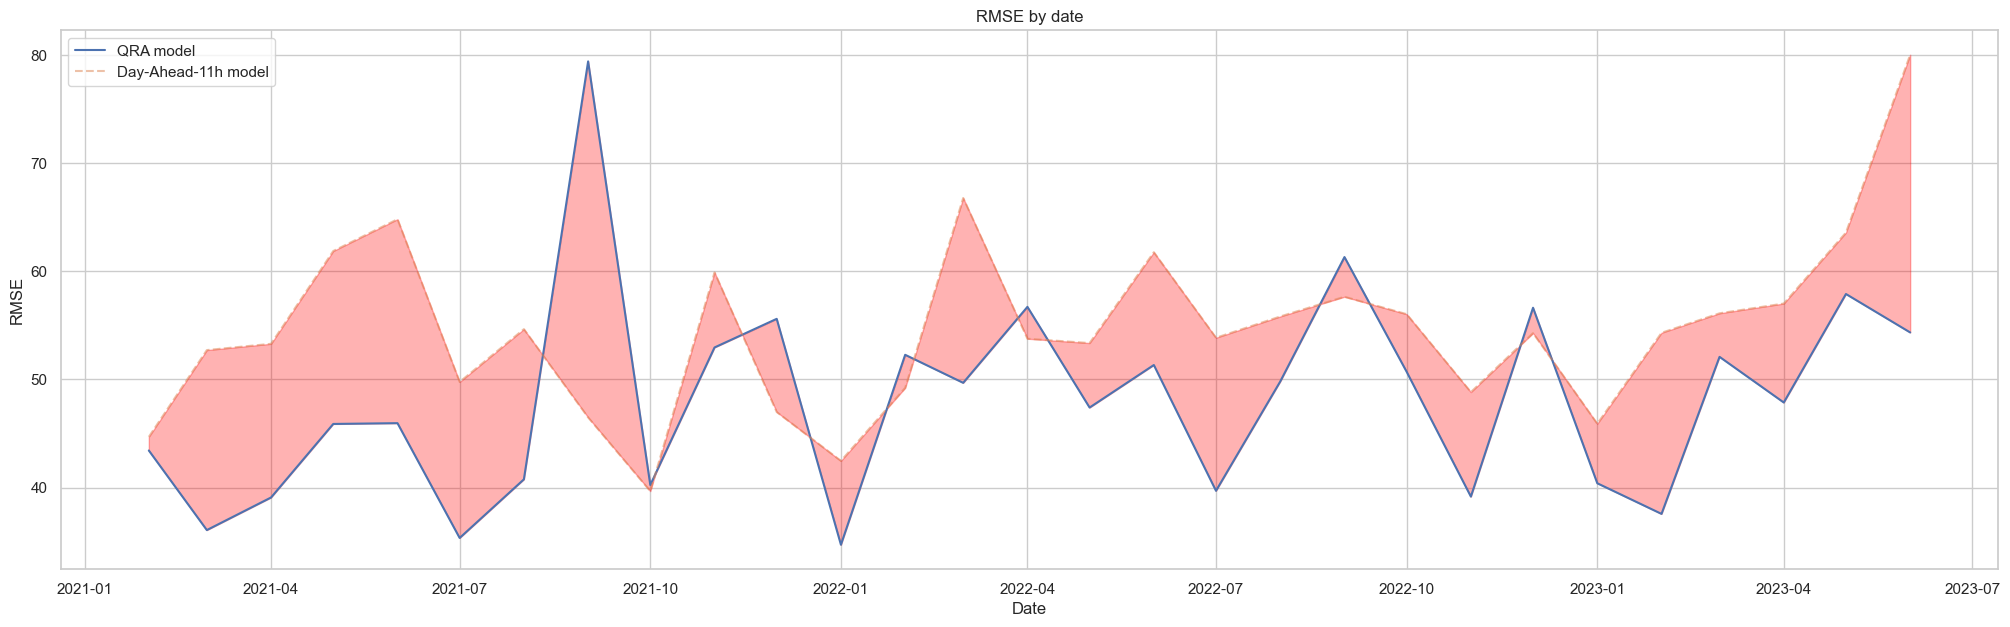

In [15]:
# Monthly-Year-based analysis
plot_ts_loss(df, rmse_list_QRA_month_year, rmse_list_dayahead11h_month_year, 'QRA model', 'Day-Ahead-11h model', date_column='month_year')
plot_ts_loss(df, pinball_loss_01_list_QRA_month_year, pinball_loss_01_list_dayahead11h_month_year, 'QRA model', 'Day-Ahead-11h model', date_column='month_year')
plot_ts_loss(df, pinball_loss_09_list_QRA_month_year, pinball_loss_09_list_dayahead11h_month_year, 'QRA model', 'Day-Ahead-11h model', date_column='month_year')

In [ ]:
import scikit_posthocs as sp

def statistical_hypothesis_testing(loss_list_QRA, loss_list_dayahead, loss_list_dayahead11h, loss_list_weekahead, loss_best_model, loss_weight_avg, loss_weight_avg_soft, loss_equal_weights):
    """ Perform statistical hypothesis testing using the Friedman test and posthoc Nemenyi test 
    """
    # Construct the dictionary from the input lists
    dict_data = {
        'QRA_ensemble': loss_list_QRA,
        'dayahead': loss_list_dayahead,
        'dayahead11h': loss_list_dayahead11h,
        'weekahead': loss_list_weekahead,
        'best_model': loss_best_model,
        'weight_avg': loss_weight_avg,
        'weight_avg_soft': loss_weight_avg_soft,
        'equal_weights': loss_equal_weights
    }
    # Transform the dictionary into a DataFrame
    data = (
        pd.DataFrame(dict_data)
        .rename_axis('days')  # Set the index name to 'days'
        .melt(                # Melt the DataFrame to long format
            var_name='model',
            value_name='loss',
            ignore_index=False,
        )
        .reset_index()        # Reset the index to include 'days' as a column
    )
    # Perform posthoc Nemenyi Friedman test
    tests_results = sp.posthoc_nemenyi_friedman(data, y_col='loss', group_col='model', block_col='days', block_id_col='days', melted=True) #
    # Define the colormap and heatmap arguments
    cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
    heatmap_args = {
        'cmap': cmap,
        'linewidths': 0.25,
        'linecolor': '0.5',
        'clip_on': False,
        'square': True,
        'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]
    }
    
    # Plot the heatmap
    plt.title("P-values posthoc Nemenyi test")
    sp.sign_plot(tests_results, **heatmap_args)
    plt.show()


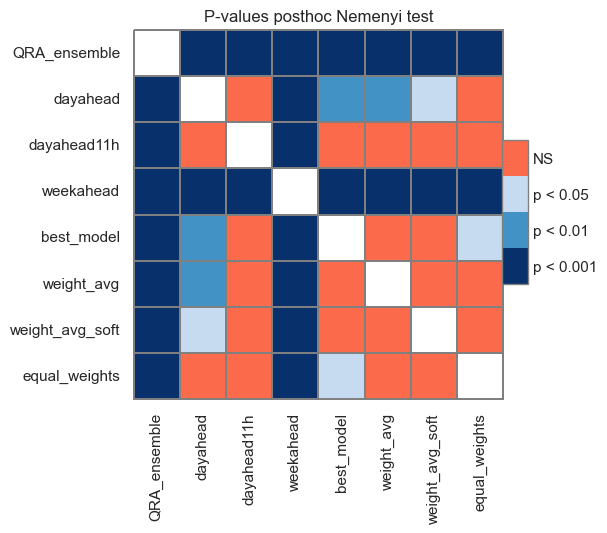

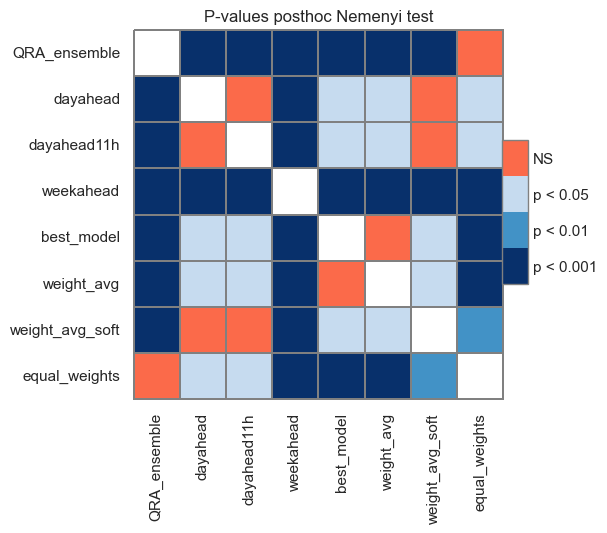

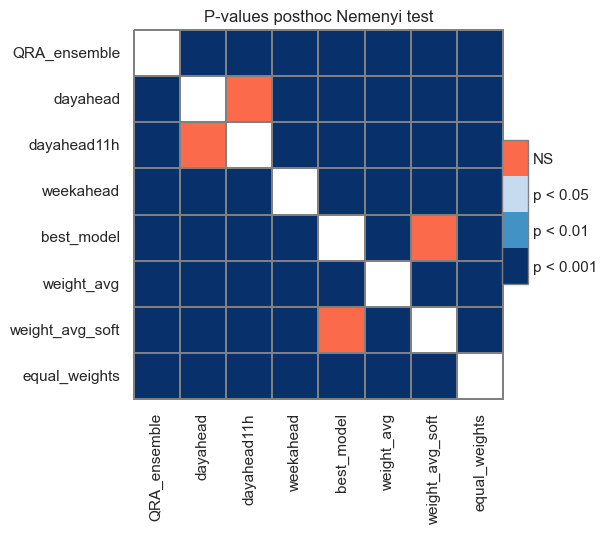

In [ ]:
# rmse
statistical_hypothesis_testing(rmse_list_QRA, rmse_list_dayahead, rmse_list_dayahead11h, rmse_list_weekahead, rmse_list_best, rmse_list_weight_avg, rmse_list_weight_avg_soft, rmse_list_equal_weights)
# pinball loss tau = 0.1
statistical_hypothesis_testing(pinball_loss_01_list_QRA, pinball_loss_01_list_dayahead11h, pinball_loss_01_list_dayahead11h, pinball_loss_01_list_weekahead, pinball_loss_01_list_best, pinball_loss_01_list_weight_avg, pinball_loss_01_list_weight_avg_soft, pinball_loss_01_list_equal_weights)
# pinball loss tau = 0.9
statistical_hypothesis_testing(pinball_loss_09_list_QRA, pinball_loss_09_list_dayahead11h, pinball_loss_09_list_dayahead11h, pinball_loss_09_list_weekahead, pinball_loss_09_list_best, pinball_loss_09_list_weight_avg, pinball_loss_09_list_weight_avg_soft, pinball_loss_09_list_equal_weights)